**Attention!**: plotly plots won't render in static envitonments like Github ,so I provided static images for them.

The data I used [Vienna](http://data.insideairbnb.com/austria/vienna/vienna/2023-06-10/visualisations/listings.csv)

## Importing required libs and settings

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import plotly.express as px
import warnings
from IPython.display import Image
%matplotlib inline

In [61]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Airbnb Listing EDA : Vienna, Austria

![Vienna](https://images.squarespace-cdn.com/content/v1/52da9677e4b03d314575985a/1465730132728-TVUJ2P1540PPDAM7WHIG/Vienna+Hotels+with+Best+Views+-+Header.jpg?format=2500w)

## Welcome to the Airbnb Listing EDA of Vienna, Austria notebook!
### In this notebook, we will be conducting an exploratory data analysis on Airbnb listings in the beautiful city of ****Vienna****. The dataset includes information about hosts, neighbourhoods, room types, pricing, reviews, and other relevant features.
### By analyzing the provided variables such as host_id, host_name, neighbourhood, latitude, longitude, room_type, prices, minimum_nights, number_of_reviews, and more, we aim to gain insights into the Airbnb market in Vienna and uncover interesting trends and patterns. 
### So, let's dive into the data and discover what it reveals about the fascinating world of Airbnb in Vienna, Austria.

## Load Data

In [62]:
df = pd.read_csv("C:\\Users\\omar9\\Downloads\\listings.csv")
df.head(10)


id                                                                  name  host_id host_name  neighbourhood_group         neighbourhood  latitude  longitude        room_type  price  minimum_nights  number_of_reviews last_review  reviews_per_month  calculated_host_listings_count  availability_365  number_of_reviews_ltm  license
0   38768           Rental unit in Vienna · ★4.75 · 1 bedroom · 3 beds · 1 bath   166283    Hannes                  NaN          Leopoldstadt  48.21924   16.37831  Entire home/apt     79               7                365  2023-05-29               2.45                               3                64                     18      NaN
1   40625          Rental unit in Vienna · ★4.84 · 2 bedrooms · 4 beds · 1 bath   175131    Ingela                  NaN  Rudolfsheim-Fnfhaus  48.18434   16.32701  Entire home/apt    186               1                193  2023-05-28               1.23                              15               326                     20      NaN
2   75500          Rental unit in Vienna · ★4.45 · 2 bedrooms · 2 beds · 1 bath   400857    Sabine                  NaN           Brigittenau  48.23493   16.36752  Entire home/apt     75               4                 14  2019-12-01               0.10                               1               206                      0      NaN
3   70637   Rental unit in Vienna · ★4.77 · 1 bedroom · 2 beds · 2 shared baths   358842      Elxe                  NaN          Leopoldstadt  48.21760   16.38018     Private room     50               2                119  2023-01-18               0.80                               3               212                      2      NaN
4   51287              Rental unit in Vienna · ★4.66 · Studio · 2 beds · 1 bath   166283    Hannes                  NaN          Leopoldstadt  48.21778   16.37847  Entire home/apt     71               5                364  2023-05-26               2.42                               3               122                     27      NaN
5  835397            Rental unit in Vienna · ★4.91 · 1 bedroom · 1 bed · 1 bath  4361476    Steffi                  NaN                Neubau  48.20083   16.34530  Entire home/apt     90              30                 24  2023-01-29               0.19                               7               284                      2      NaN
6   90247           Rental unit in Vienna · ★4.85 · 1 bedroom · 2 beds · 1 bath   489611     Diana                  NaN                Neubau  48.20599   16.34890  Entire home/apt    124               1                716  2023-05-21               4.84                               2               274                     66      NaN
7   98210  Rental unit in Vienna · ★4.56 · 1 bedroom · 1 bed · Shared half-bath   518644   Michael                  NaN            Margareten  48.19409   16.35857     Private room     50               1                131  2023-06-03               0.89                              35               154                     27      NaN
8  109679              Rental unit in Vienna · ★4.86 · Studio · 4 beds · 1 bath   175131    Ingela                  NaN  Rudolfsheim-Fnfhaus  48.18467   16.32795  Entire home/apt    130               1                133  2023-03-12               0.98                              15               275                      8      NaN
9  311904           Rental unit in Vienna · ★4.48 · 1 bedroom · 3 beds · 1 bath  1100216   Belinda                  NaN            Margareten  48.18461   16.35976  Entire home/apt     45               5                160  2023-06-02               1.17                               2               228                     26      NaN

## Data Shape , Info , Description

In [63]:
df.shape

(13296, 18)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13296 entries, 0 to 13295
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13296 non-null  int64  
 1   name                            13296 non-null  object 
 2   host_id                         13296 non-null  int64  
 3   host_name                       13295 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13296 non-null  object 
 6   latitude                        13296 non-null  float64
 7   longitude                       13296 non-null  float64
 8   room_type                       13296 non-null  object 
 9   price                           13296 non-null  int64  
 10  minimum_nights                  13296 non-null  int64  
 11  number_of_reviews               13296 non-null  int64  
 12  last_review                     

In [65]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365  number_of_reviews_ltm
count  13296.000000    13296.000000       13296.000000       11046.000000                    13296.000000      13296.000000           13296.000000
mean     108.110484        6.572127          37.266922           1.515652                       17.531889        158.637861              11.557837
std      223.944830       27.681084          69.916988           1.802595                       43.237470        135.036098              19.449284
min        0.000000        1.000000           0.000000           0.010000                        1.000000          0.000000               0.000000
25%       52.000000        1.000000           2.000000           0.230000                        1.000000          4.000000               0.000000
50%       79.000000        2.000000           9.000000           0.900000                        2.000000        149.000000               2.000000
75%      115.000000        3.000000          41.000000           2.180000                       13.000000        297.000000              15.000000
max     9270.000000     1125.000000         982.000000          37.150000                      278.000000        365.000000             330.000000

## Cleaning data 

In [66]:
#Drop duplicated rows if any
df.drop_duplicates(inplace=True)

####  Find null values

In [67]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               13296
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2250
reviews_per_month                  2250
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           13296
dtype: int64

#### Choose either filling these values or dropping them

In [68]:
df['last_review'].fillna(df['reviews_per_month'].median,inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean,inplace=True)


In [69]:
df.dropna(subset=['host_name'], inplace=True)

#### There are some columns that are either fully-null or not needed in exploration, so we drop them

In [70]:
df.drop(['id','neighbourhood_group','license'], axis=1,inplace=True)

Check if there are nulls again

In [71]:
df.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### Columns Correlations

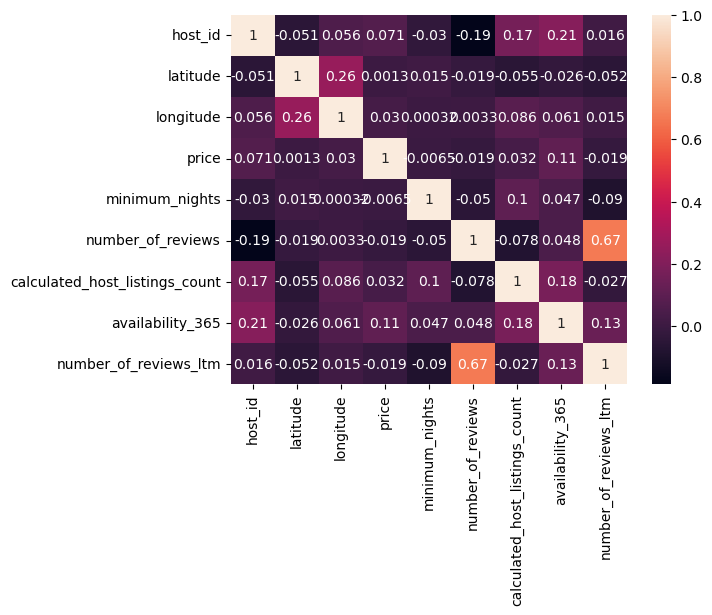

In [88]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

## Hosts' listings

Show how many hosts own X number of properties

In [73]:
host_props = df.groupby(['calculated_host_listings_count'])['room_type'].count().reset_index()
host_props_h = host_props.sort_values(by ='calculated_host_listings_count',ascending = True).head(10)
host_props_t = host_props.sort_values(by ='calculated_host_listings_count',ascending = True).tail(10)


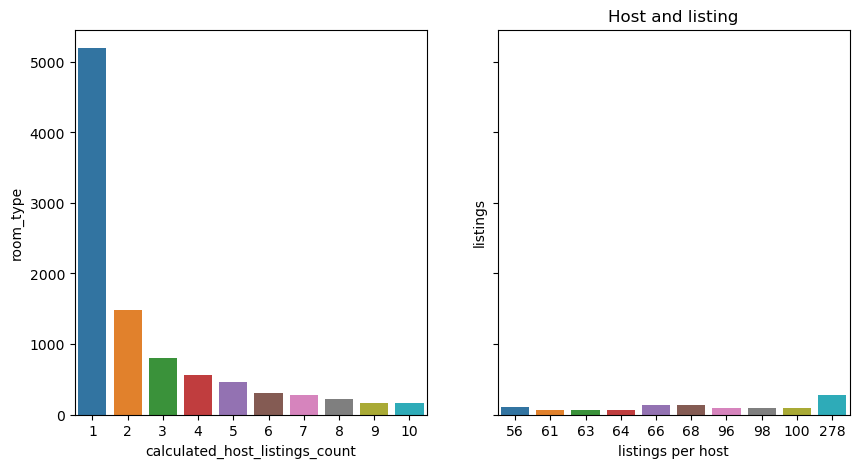

In [74]:
_,axes=plt.subplots(nrows=1,ncols=2,sharey=True, figsize=(10,5))
sns.barplot(data=host_props_h,x='calculated_host_listings_count',y='room_type',ax=axes[0])
sns.barplot(data=host_props_t,x='calculated_host_listings_count',y='room_type',ax=axes[1])
plt.title('Host and listing')
plt.ylabel('listings')
plt.xlabel('listings per host')
plt.show()

 From visulaiztion above we conclude that:
There are some Airbnb hosts who have **multiple listings**.
These hosts may list individual rooms within a single apartment, or they may have multiple apartments or homes available as a whole.
Hosts who have multiple listings often **operate as a business**, typically do not reside in the property, and may be violating various short-term rental laws that aim to safeguard residential housing. 

## Top Hosts

In [75]:
top_host=pd.crosstab([df['host_id'],df['host_name']],df['room_type'],margins=True).sort_values(by='All', ascending=False).head(21)
top_host.iloc[1:,:]

room_type                                Entire home/apt  Hotel room  Private room  Shared room  All
host_id   host_name                                                                                 
385064248 Blueground                                 278           0             0            0  278
365561660 Illia                                      100           0             0            0  100
2816192   Martin                                      97           0             1            0   98
15935294  Vienna Residence GmbH                       96           0             0            0   96
496052458 Khurshed                                     0           0            68            0   68
88128342  Adam                                        51           0            17            0   68
450691128 Mario                                       60           0             6            0   66
8632750   Andreas                                     65           0             1            0   66
54441651  Vienna Stay Apartments                      64           0             0            0   64
404652017 Alpheus                                     60           0             3            0   63
27775775  Rene                                        57           0             3            1   61
5874520   AdInfinitum Philip Bea Sophia               56           0             0            0   56
1547126   Anna & Vladan                               56           0             0            0   56
106634851 Michael                                     54           0             0            0   54
4331202   Florian                                     51           0             0            0   51
14070533  Prestige Apartments Sabrina                 50           1             0            0   51
416402573 Herbert                                     17           0            33            0   50
50945012  Easy Flat TEAM                              49           0             0            0   49
151869337 Seb Jack Und Marc                           46           0             2            0   48
153864304 Nadland Immoinvest                          45           0             0            0   45

#### From table above we can conclude that hosts can have multiple lisitng of various types

## Rooms and their types

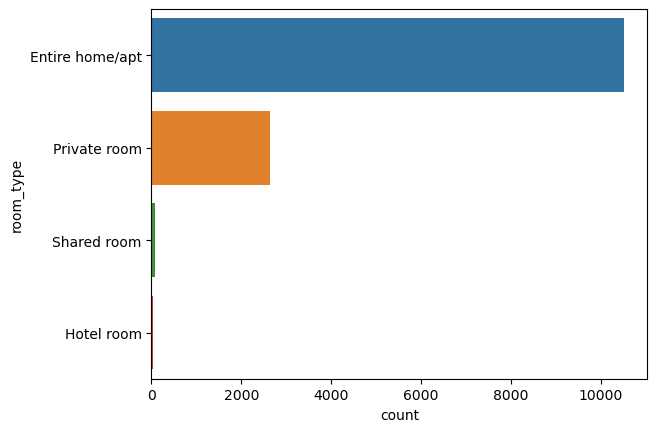

In [76]:
sns.countplot(y='room_type',data=df)
plt.show()



In [77]:
room_values=df['room_type'].value_counts().values
room_names=df['room_type'].value_counts().index
px.pie(df, values=room_values,names=room_names, width=600)



#### Static image for static environments
![room_pie](https://i.ibb.co/jvwrXp7/rooms-pie.png)


In [78]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="room_type",hover_name="name", zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Static image for static environments
![rooms_map](https://i.ibb.co/YB6Gxs9/rooms-map.png)

From above observation we conclude that most of the rooms/listings are of type **Entire home/apt** and least of them are of type **Hotel rooms**

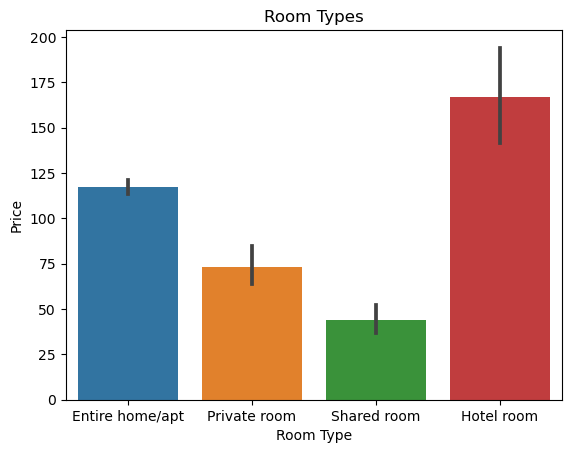

In [79]:
sns.barplot(data=df,x = 'room_type',y='price')
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

Observing the plot above we realize that **Hotel rooms** are the most expensive will **Shared rooms** are the least

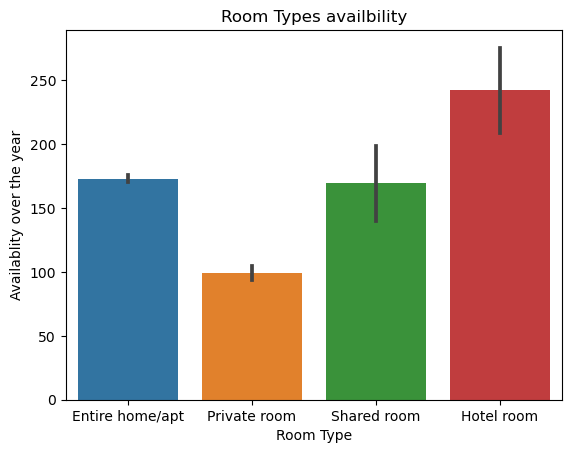

In [80]:
sns.barplot(data=df,x = 'room_type',y='availability_365')
plt.title('Room Types availbility')
plt.xlabel('Room Type')
plt.ylabel('Availablity over the year')
plt.show()

From the observation above, we find that **hotel rooms are the most available** type throughout the year, while **private rooms are the least available**. This may be due to the host's residency in this room.

## Neighbourhoods

In [81]:
df.groupby(['neighbourhood'])[['price','minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']].describe()

price                                                              minimum_nights                                                   number_of_reviews                                                     calculated_host_listings_count                                                    availability_365                                                           number_of_reviews_ltm                                                   
                       count        mean         std   min     25%    50%     75%     max          count       mean        std  min  25%  50%  75%     max             count       mean        std  min  25%   50%    75%    max                          count       mean        std  min  25%  50%    75%    max            count        mean         std  min    25%    50%     75%    max                 count       mean        std  min  25%  50%    75%    max
neighbourhood                                                                                                                                                                                                                                                                                                                                                                                                                                                         
Alsergrund             719.0  107.717663  256.963812   9.0   49.00   74.0  113.00  5000.0          719.0   5.671766  12.152612  1.0  1.0  2.0  3.0   180.0             719.0  33.471488  55.618467  0.0  2.0   9.0  38.00  329.0                          719.0  15.828929  34.773480  1.0  1.0  2.0  15.00  278.0            719.0  135.111266  133.132137  0.0   0.00   91.0  276.00  365.0                 719.0  10.222531  15.898196  0.0  0.0  2.0  15.00   84.0
Brigittenau            593.0  102.291737  217.469229  10.0   55.00   75.0  115.00  5000.0          593.0   5.946037  15.760468  1.0  1.0  2.0  3.0   190.0             593.0  30.851602  57.506800  0.0  1.0   6.0  33.00  392.0                          593.0  16.512648  37.872255  1.0  1.0  3.0  16.00  278.0            593.0  175.086003  132.517111  0.0  15.00  184.0  301.00  365.0                 593.0   9.888702  16.901576  0.0  0.0  2.0  10.00   98.0
Donaustadt             418.0  111.765550  257.922985  15.0   54.00   80.0  115.75  5000.0          418.0   4.645933  10.646669  1.0  1.0  2.0  3.0    90.0             418.0  23.813397  40.938904  0.0  1.0   7.0  28.00  305.0                          418.0  15.846890  48.575146  1.0  1.0  2.0  11.50  278.0            418.0  185.997608  138.377867  0.0  44.00  208.5  319.75  365.0                 418.0   8.622010  16.192063  0.0  0.0  2.0  12.00  153.0
Dbling                250.0   93.444000   90.643299  10.0   50.00   79.0  100.00   800.0          250.0  10.072000  28.210390  1.0  2.0  2.0  5.0   365.0             250.0  20.448000  40.293792  0.0  1.0   6.0  21.00  272.0                          250.0   8.616000  28.124589  1.0  1.0  1.0   3.00  278.0            250.0  138.800000  138.316383  0.0   0.00  105.5  282.00  365.0                 250.0   4.396000   8.504616  0.0  0.0  0.5   6.00   60.0
Favoriten             1084.0  102.944649  147.501903   8.0   55.00   80.0  108.00  2999.0         1084.0   4.622694   9.592370  1.0  1.0  2.0  3.0    90.0            1084.0  31.070111  60.155759  0.0  1.0   9.0  35.25  674.0                         1084.0  28.704797  57.050281  1.0  1.0  5.0  39.00  278.0           1084.0  192.153137  132.902913  0.0  68.00  199.5  328.00  365.0                1084.0  13.281365  20.719986  0.0  0.0  3.0  18.00  134.0
Floridsdorf            183.0  107.327869  100.238790  15.0   55.00   86.0  130.00  1000.0          183.0   5.967213  29.617136  1.0  1.0  2.0  3.0   365.0             183.0  16.797814  42.270812  0.0  1.0   3.0  13.00  407.0                          183.0   9.202186  16.501335  1.0  1.0  1.0   3.00   66.0            183.0  203.322404  143.805194  0.0  58.00  265.0  340.00  365.0  

In [82]:
px.pie(df, values=df['neighbourhood'].value_counts().values,names=df['neighbourhood'].value_counts().index)


#### Static image for static environments
![Neighbourhoods_pie](https://i.ibb.co/j4KFpqf/neighbourhoods-pie.png)

In [83]:
df.groupby(['neighbourhood'])[['room_type']].value_counts().sort_values(ascending=False).reset_index().head(10)


neighbourhood        room_type     0
0          Leopoldstadt  Entire home/apt  1185
1            Landstra§e  Entire home/apt   965
2             Favoriten  Entire home/apt   925
3  Rudolfsheim-Fnfhaus  Entire home/apt   791
4              Meidling  Entire home/apt   599
5            Margareten  Entire home/apt   556
6             Ottakring  Entire home/apt   553
7            Alsergrund  Entire home/apt   530
8          Innere Stadt  Entire home/apt   525
9                Neubau  Entire home/apt   508

In [84]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="neighbourhood",hover_name="name", zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Static image for static environments
![Neighbourhoods_map](https://i.ibb.co/ZSCs8H5/neighbourhoods-map.png)

Observations above show that **Leopoldstadt** neighbourhood followed by **Landstra§e** neighbourhood have large number of listings

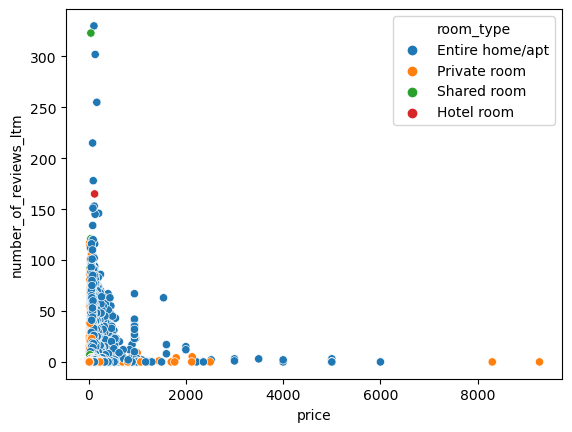

In [85]:
sns.scatterplot(data=df,x='price',y='number_of_reviews_ltm',hue='room_type')
plt.show()

From observation aboce we come to conclusion that **people tend to rent least expensive listings** thats why these listings have many reviews per month

In [86]:
renting_duration = df.groupby(['minimum_nights'])['room_type'].count().reset_index()
renting_duration = renting_duration.sort_values(by ='minimum_nights',ascending = True).head(35)
renting_duration.T

0     1     2    3    4    5    6   7   8   9   10  11  12   13  14  15  16  17  18  19  20  21  22  23  24  25   26  27   28  29  30  31  32  33  34
minimum_nights     1     2     3    4    5    6    7   8   9  10  11  12  13   14  15  16  17  18  19  20  21  22  23  25  26  27   28  29   30  31  32  33  35  40  45
room_type       4868  3580  1886  526  451  118  372  12   8  90   5  10  18  134  30   2   2   9   1  53  46   2   2  13   3   3  139  28  607  15   2   1   2   2   3

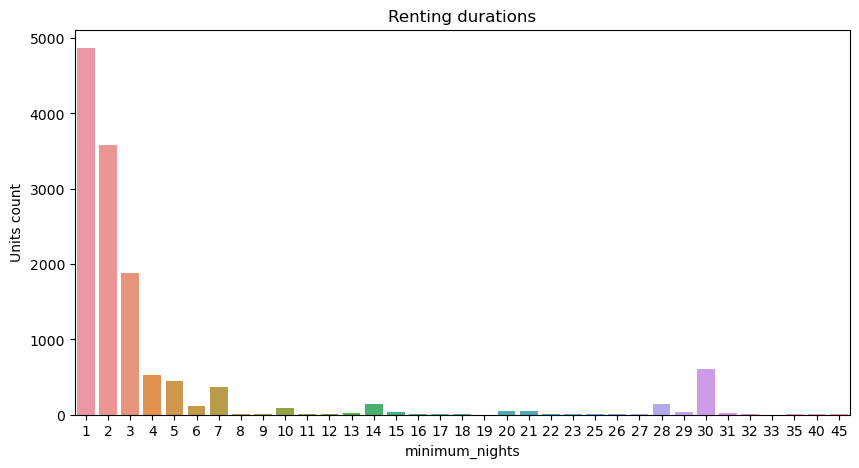

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(data=renting_duration,x='minimum_nights',y='room_type')
plt.title('Renting durations')
plt.ylabel('Units count')
plt.show()

Observing the above barplot we come to conclusion that The housing policies of cities and towns can be restrictive of **short-term rentals**, to protect housing for residents.

By looking at the **"minimum nights"** setting for listings, we can see if the market has shifted to longer-term stays (ex: 28-30 days). Was it to avoid regulations, or in response to changes in travel demands?

In some cases, Airbnb has moved large numbers of their listings to longer-stays to avoid short-term rental regulations and accountability.